In [1]:
import csv
import math
import matplotlib.pyplot as plt

In [18]:
x = []
y = []
filename = 'data.csv'

with open(filename, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        x.append(float(row['X']))
        y.append(float(row['Y']))

data = list(zip(x, y))
centroid1 = data[0]
centroid2 = data[3]
print("Data: ", data)
print("Centroid: ", centroid1, centroid2)

Data:  [(1.0, 1.0), (1.5, 2.0), (3.0, 4.0), (5.0, 7.0), (3.5, 5.0), (4.5, 5.0), (3.5, 4.5)]
Centroid:  (1.0, 1.0) (5.0, 7.0)


In [19]:
cluster1 = []
cluster2 = []
iteration = 0

while(True):
    flag_centroid1 = centroid1
    flag_centroid2 = centroid2

    for i in data:
        c1 = math.sqrt(pow((i[0] - centroid1[0]), 2) + pow((i[1] - centroid1[1]), 2))
        c2 = math.sqrt(pow((i[0] - centroid2[0]), 2) + pow((i[1] - centroid2[1]), 2))
        
        if(c1 < c2):
            cluster1.append(i)
        else:
            cluster2.append(i)

    x_sum = 0
    y_sum = 0

    for i in cluster1:
        x_sum += i[0]
        y_sum += i[1]

    centroid1 = [round((x_sum / len(cluster1)), 2), round((y_sum / len(cluster1)), 2)]

    x_sum = 0
    y_sum = 0

    for i in cluster2:
        x_sum += i[0]
        y_sum += i[1]

    centroid2 = [round((x_sum / len(cluster2)), 2), round((y_sum / len(cluster2)), 2)]

    iteration += 1

    if(centroid1 == flag_centroid1 and centroid2 == flag_centroid2):
        break;
    
    cluster1 = []
    cluster2 = []

print("Iteration: ", iteration)
print("Cluster 1: ", cluster1)
print("Cluster 2: ", cluster2)
print("Centroid 1: ", centroid1)
print("Centroid 2: ", centroid2)

Iteration:  2
Cluster 1:  [(1.0, 1.0), (1.5, 2.0)]
Cluster 2:  [(3.0, 4.0), (5.0, 7.0), (3.5, 5.0), (4.5, 5.0), (3.5, 4.5)]
Centroid 1:  [1.25, 1.5]
Centroid 2:  [3.9, 5.1]


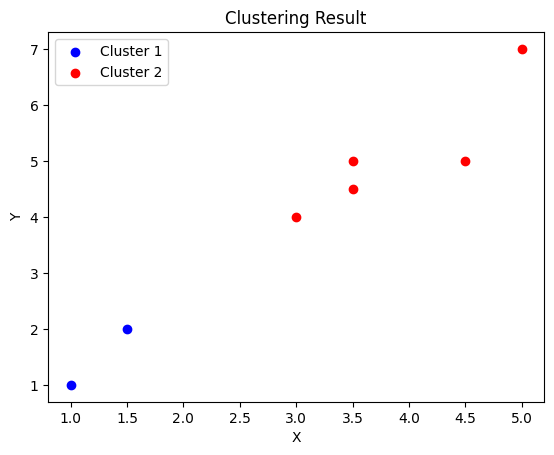

In [20]:
x1, y1 = zip(*cluster1)
x2, y2 = zip(*cluster2)

plt.scatter(x1, y1, color='blue', label='Cluster 1')
plt.scatter(x2, y2, color='red', label='Cluster 2')

plt.legend()

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering Result')
plt.show()